# Objectives
1. Analyse and explore the Boston house price data
2. Split the data for training and testing
3. Run a Multivariable Regression
4. Evaluate how the model's coefficients and residuals
5. Use data transformation to improve the model performance
6. Use the model to estimate a property price

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
data = pd.read_csv('boston.csv', index_col=0)

In [4]:
data.shape

(506, 13)

In [5]:
data.columns 

Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
data.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,,,,,,,,,,,,,
0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,NaN,36.20


In [7]:
data.tail()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,,,,,,,,,,,,,
0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1,273,21.00,391.99,NaN,22.40
0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08,20.60
0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64,23.90
0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48,22.00
0.05,0.00,11.93,0.00,0.57,6.03,NaN,2.50,1,273,21.00,396.90,7.88,11.90


In [8]:
data.count()

ZN         486
INDUS      486
CHAS       486
NOX        506
RM         506
AGE        486
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      486
MEDV       506
dtype: int64

# Data Cleaning - Check for Missing Values and Duplicates

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0.00632 to 0.04741
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ZN       486 non-null    float64
 1   INDUS    486 non-null    float64
 2   CHAS     486 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      486 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    int64  
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    486 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 55.3 KB


In [10]:
print(f'Any NaN values? {data.isna().values.any()}')

Any NaN values? True


In [11]:
data = data.dropna()

In [12]:
print(f'Any duplicates? {data.duplicated().values.any()}')

Any duplicates? False


In [13]:
print(f'Any NaN values? {data.isna().values.any()}')

Any NaN values? False


# Descriptive Statistics

In [14]:
data.describe()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,413.00,413.00,413.00,413.00,413.00,413.00,413.00,413.00,413.00,413.00,413.00,413.00,413.00
mean,11.73,10.94,0.07,0.55,6.29,68.75,3.81,9.54,408.21,18.49,357.39,12.65,22.53
std,23.96,6.90,0.26,0.11,0.70,28.01,2.10,8.67,168.90,2.19,90.54,7.25,9.26
min,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,2.60,1.73,5.00
25%,0.00,5.13,0.00,0.45,5.89,45.10,2.11,4.00,281.00,17.40,376.57,6.92,16.80
50%,0.00,8.56,0.00,0.54,6.21,77.70,3.18,5.00,330.00,19.10,392.05,11.25,21.20
75%,12.50,18.10,0.00,0.62,6.62,94.10,5.12,24.00,666.00,20.20,396.90,16.96,25.10
max,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [15]:
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 413 data points with 13 variables each.


# Visualise the Features 

 # house prices

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


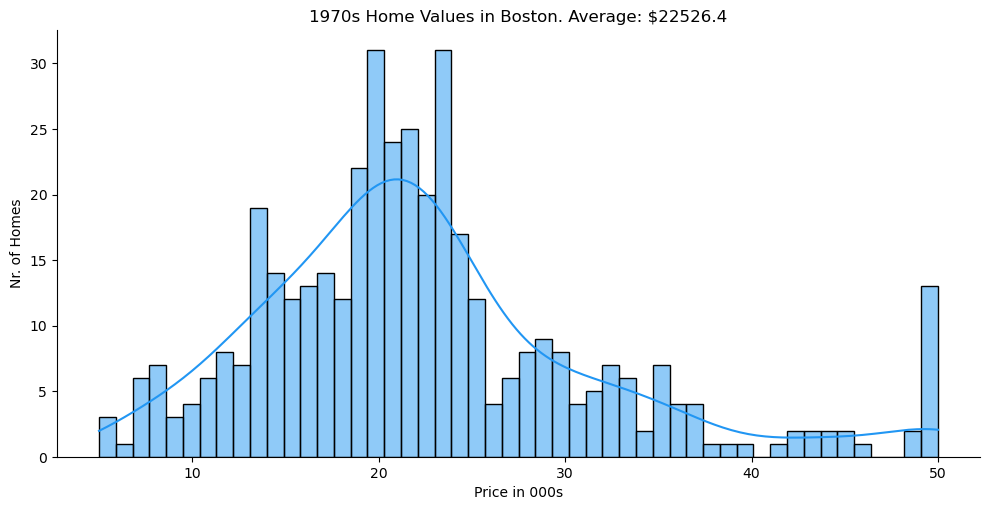

In [16]:
sns.displot(data['MEDV'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'1970s Home Values in Boston. Average: ${(1000*data.MEDV.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')

plt.show()

There is a spike in the number homes at the very right tail at the $50,000 mark.

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


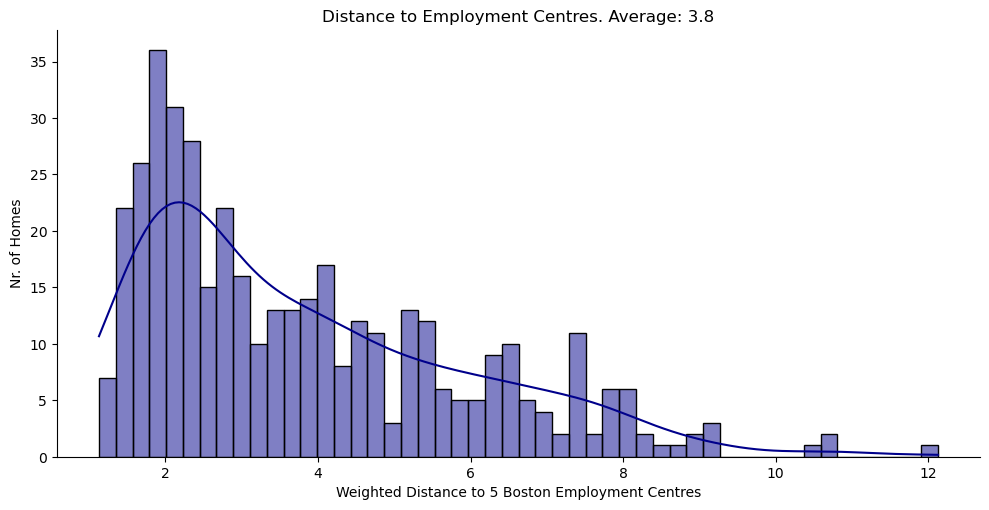

In [17]:
sns.displot(data.DIS, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='darkblue')

plt.title(f'Distance to Employment Centres. Average: {(data.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Nr. of Homes')

plt.show()

Most homes are about 3.8 miles away from work. There are fewer and fewer homes the further out we go.

# Number of Rooms

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


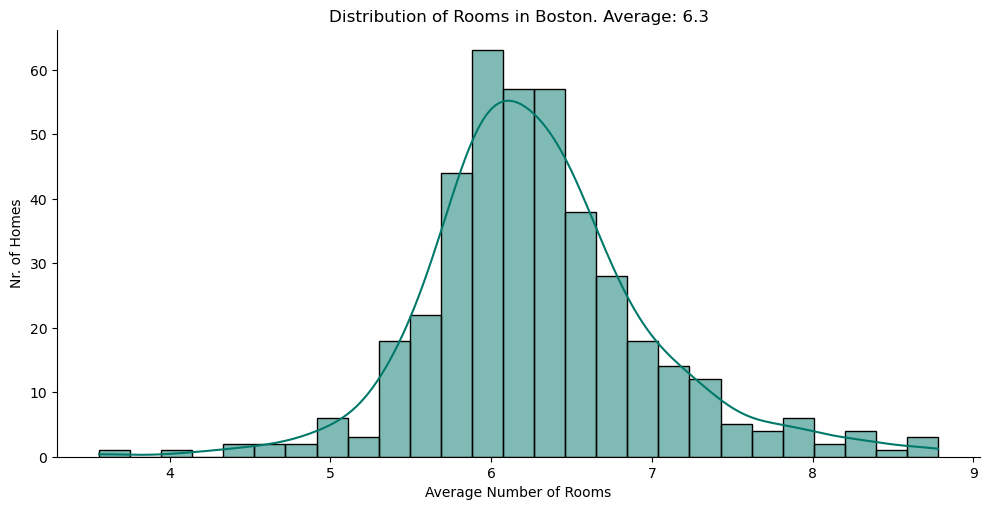

In [18]:
sns.displot(data.RM, 
            aspect=2,
            kde=True, 
            color='#00796b')

plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')

plt.show()

# access to highways 

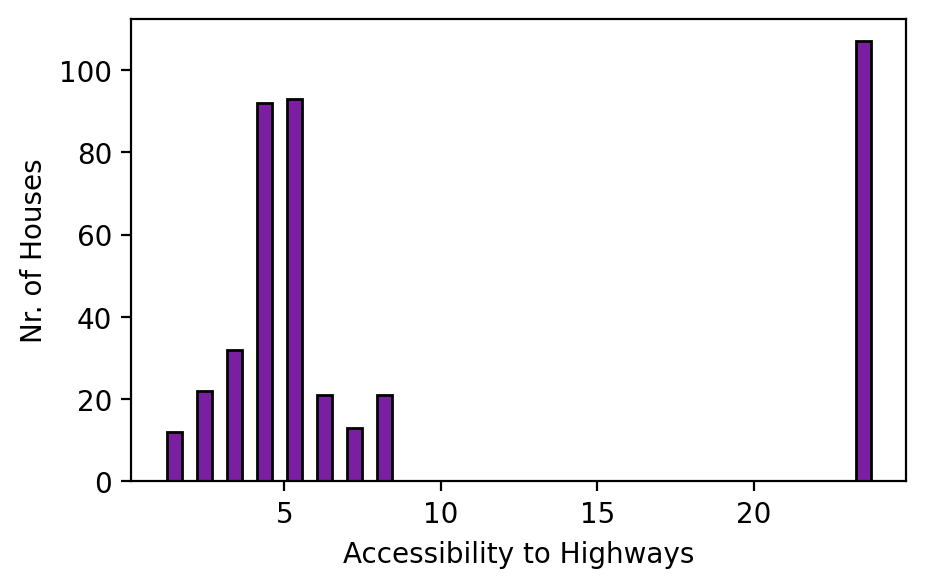

In [19]:
plt.figure(figsize=(5,3),  dpi=200)
plt.hist(data['RAD'],
         bins=24, 
         ec='black', 
         color='#7b1fa2', 
         rwidth=0.5)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

RAD is an index of accessibility to roads. Better access to a highway is represented by a higher number. There's a big gap in the values of the index.

# Next to the River

In [25]:
river_access = data['CHAS'].value_counts()

bar = px.bar(x=['No', 'Yes'],
             y=river_access.values,
             color=river_access.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Next to Charles River?')

bar.update_layout(xaxis_title='Property Located Next to the River?', 
                  yaxis_title='Number of Homes',
                  coloraxis_showscale=False)
bar.show()

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



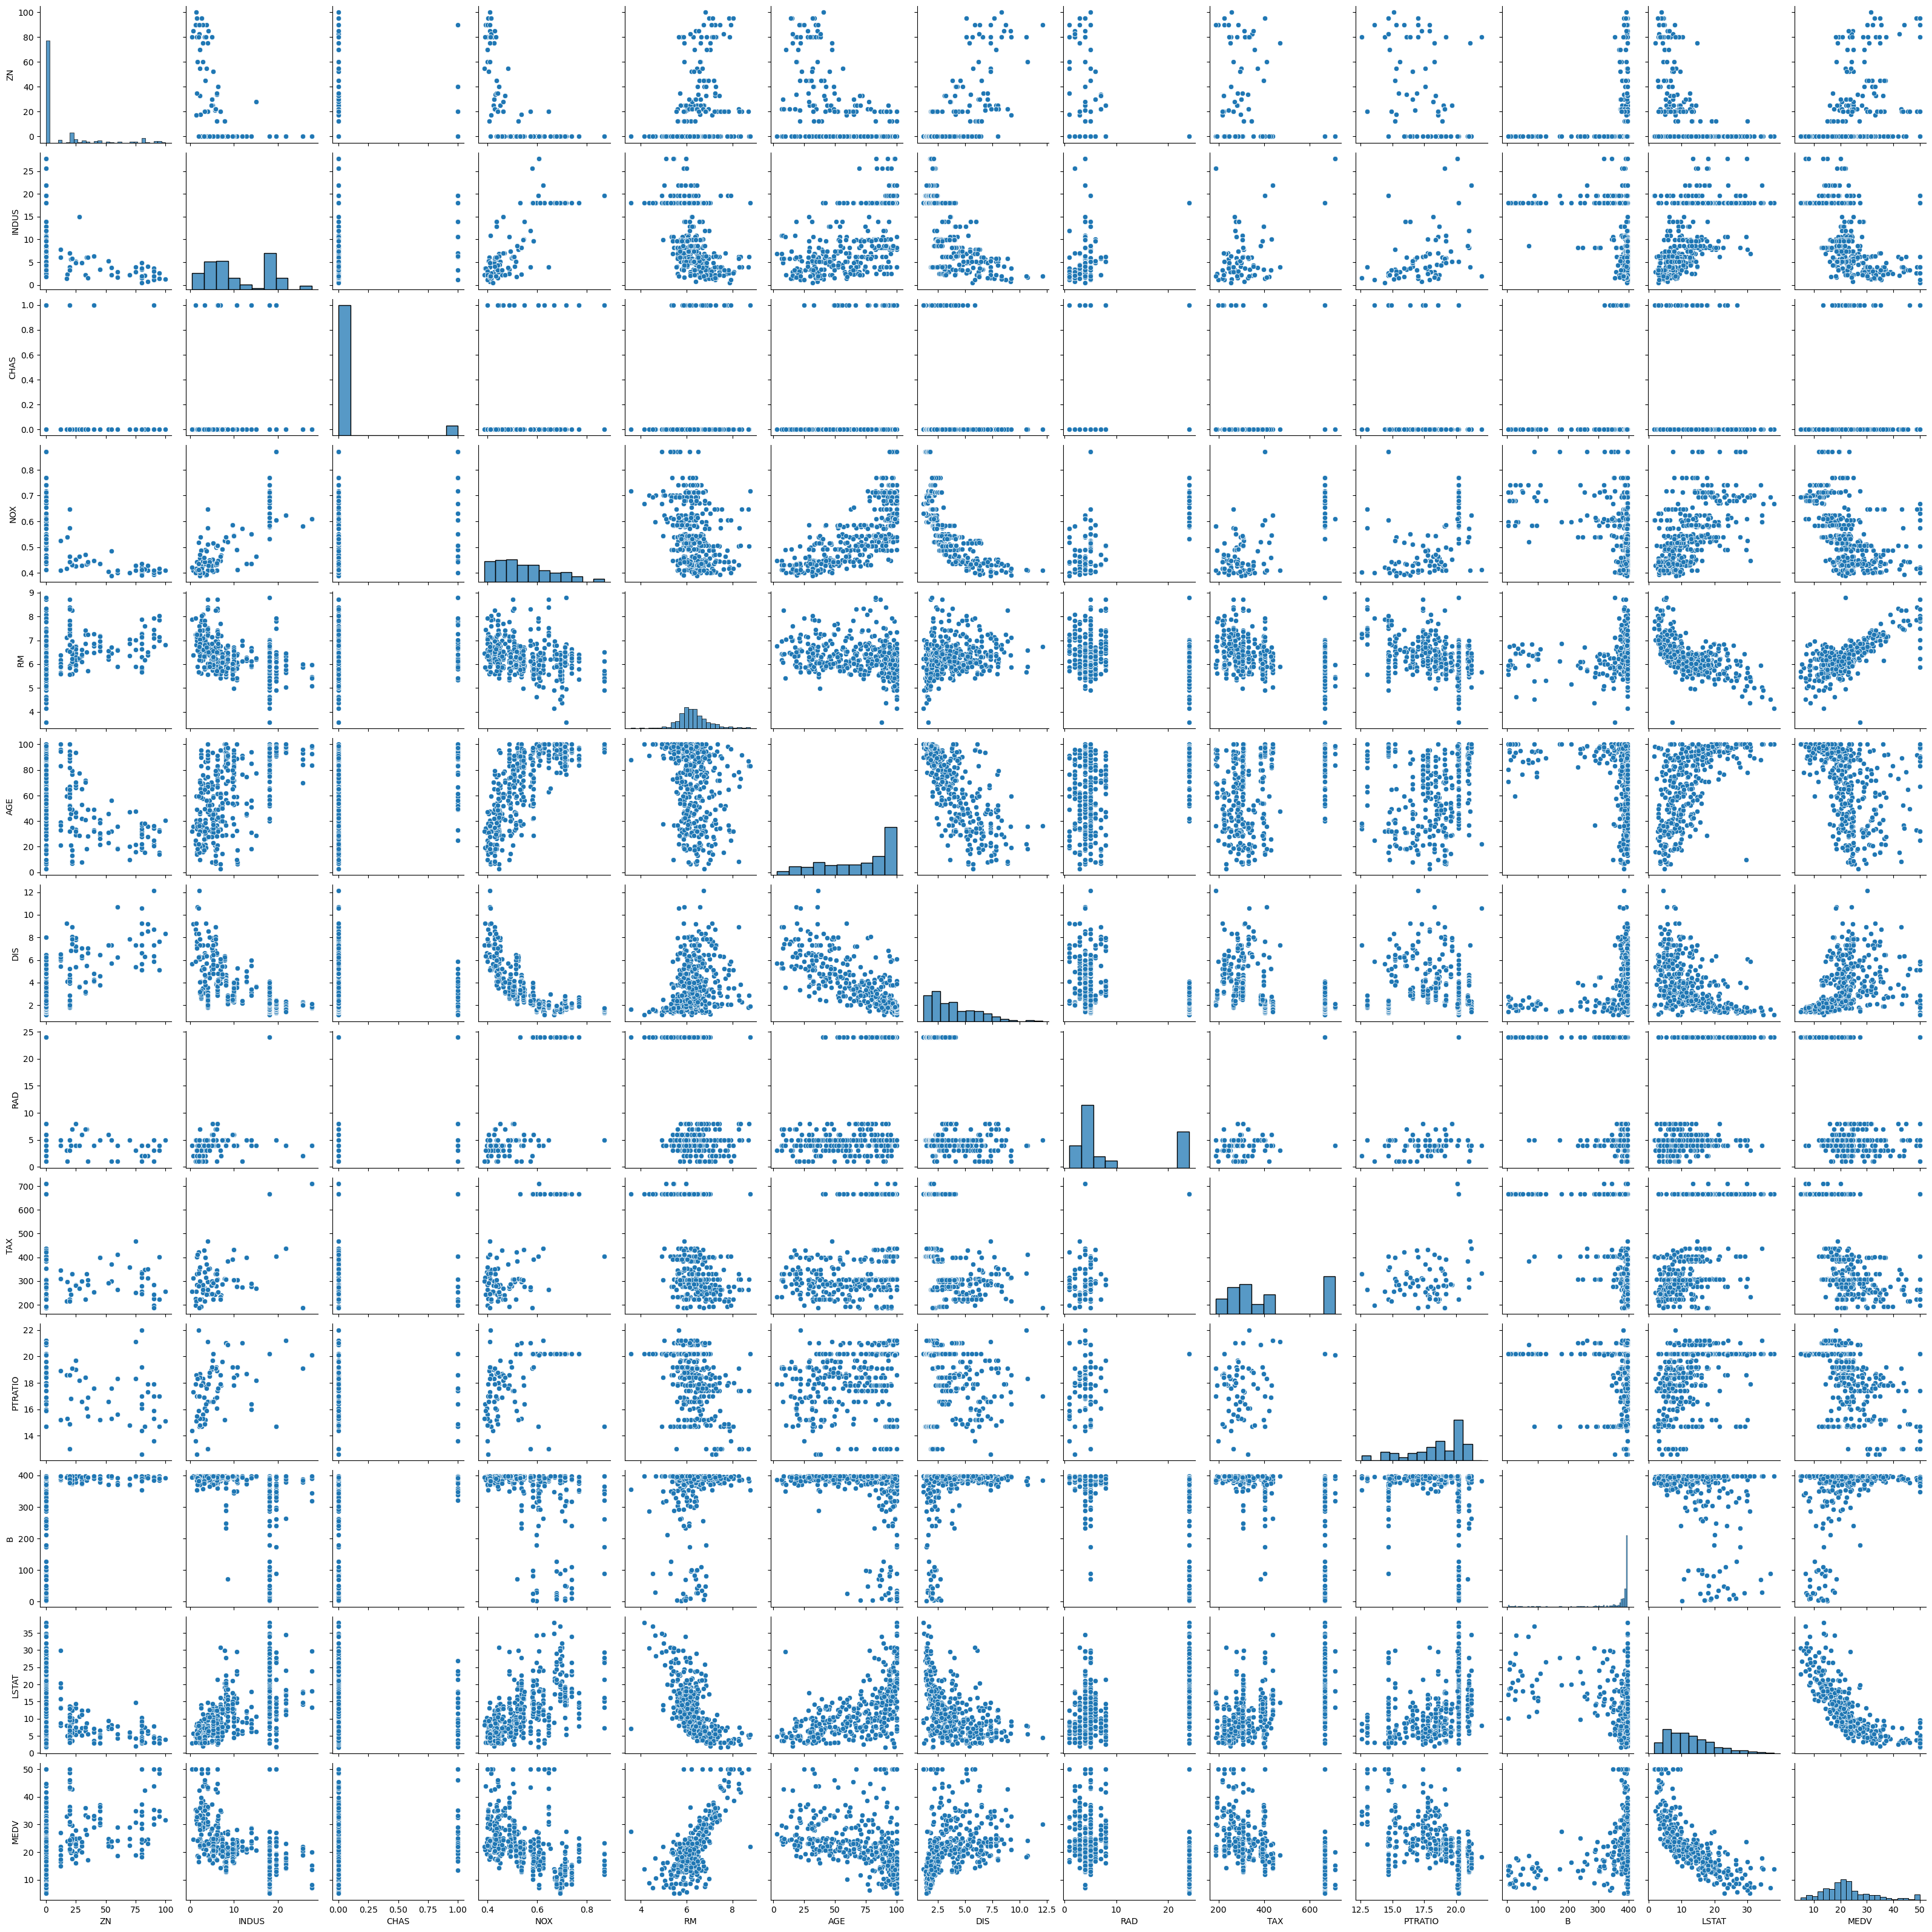

In [26]:
sns.pairplot(data)
plt.show()

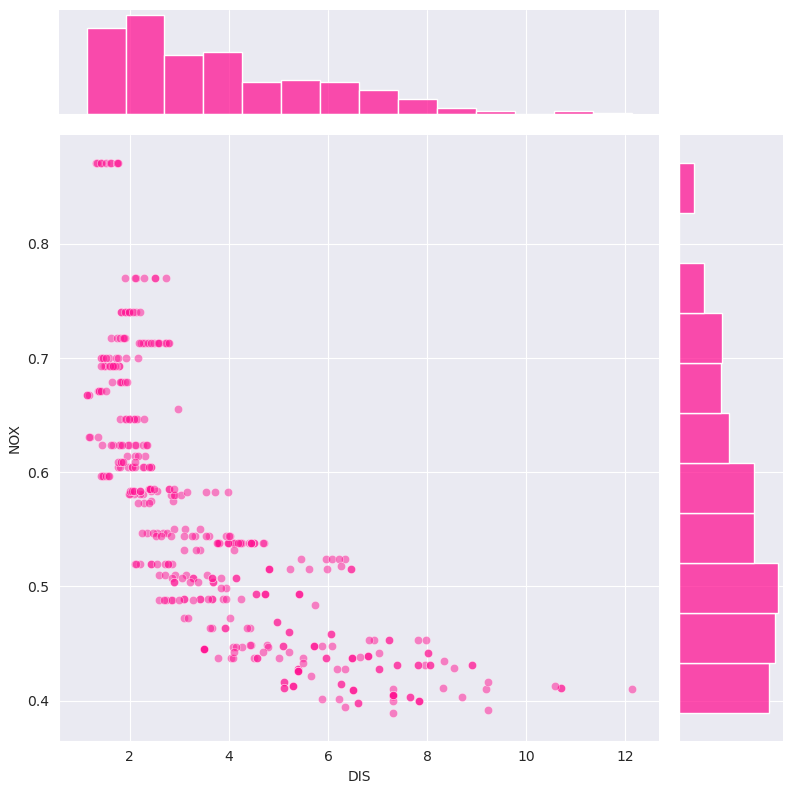

In [27]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['DIS'], 
                y=data['NOX'], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

We see that pollution goes down as we go further and further out of town. This makes intuitive sense. However, even at the same distance of 2 miles to employment centres, we can get very different levels of pollution. By the same token, DIS of 9 miles and 12 miles have very similar levels of pollution.

# Proportion of Non-Retail Industry vs Pollution


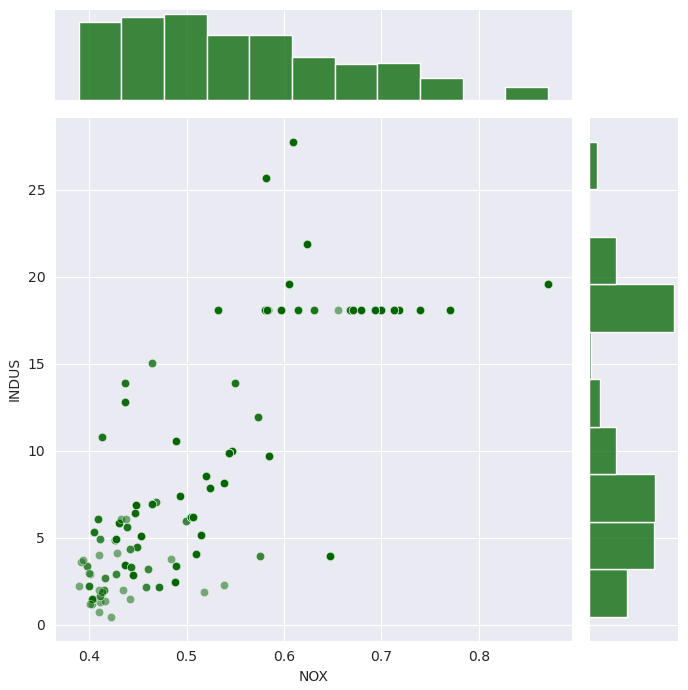

In [28]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.NOX, 
                y=data.INDUS, 
                # kind='hex', 
                height=7, 
                color='darkgreen',
                joint_kws={'alpha':0.5})
plt.show()

# % of Lower Income Population vs Average Number of Rooms

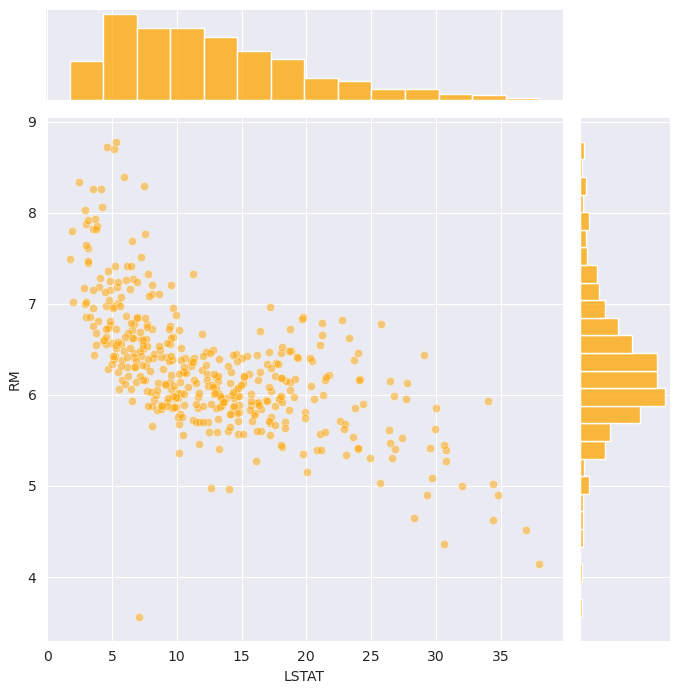

In [29]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['LSTAT'], 
                y=data['RM'], 
                # kind='hex', 
                height=7, 
                color='orange',
                joint_kws={'alpha':0.5})
plt.show()

In the top left corner we see that all the homes with 8 or more rooms, LSTAT is well below 10%.

# % of Lower Income Population versus Home Price

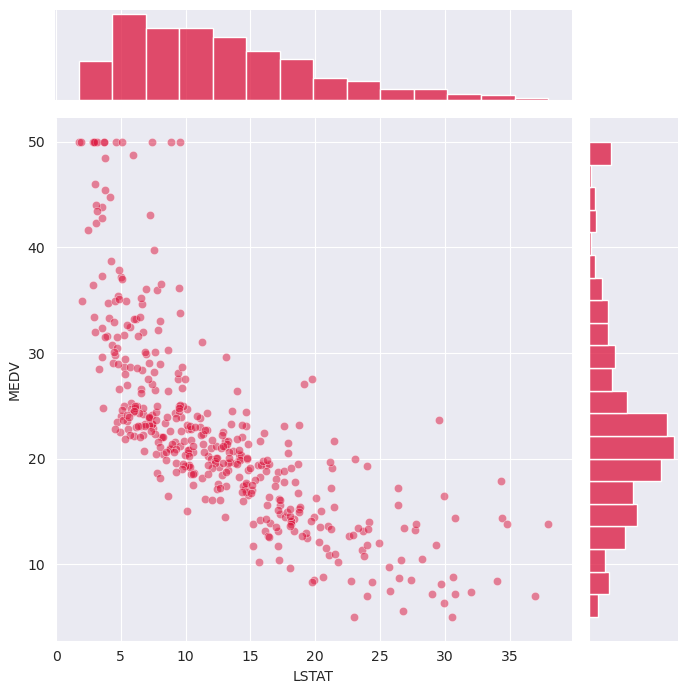

In [31]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.LSTAT, 
                y=data.MEDV, 
                # kind='hex', 
                height=7, 
                color='crimson',
                joint_kws={'alpha':0.5})
plt.show()

# Number of Rooms versus Home Value

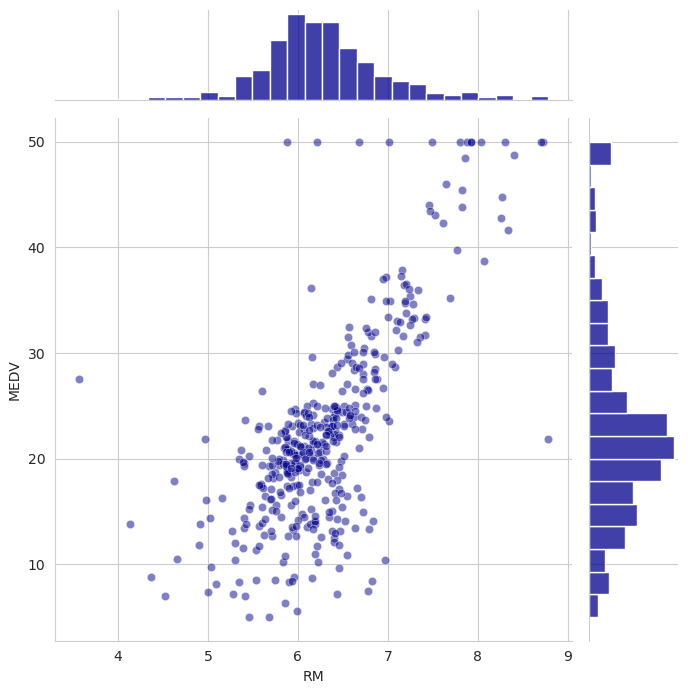

In [33]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x=data.RM, 
                y=data.MEDV, 
                height=7, 
                color='darkblue',
                joint_kws={'alpha':0.5})
plt.show()

Again, we see those homes at the $50,000 mark all lined up at the top of the chart. Perhaps there was some sort of cap or maximum value imposed during data collection.